## **ISOM 672 Final Project**

David Ishimwe Ruberamitwe, Richard Jensen, Yifei Wang, Laurie Ye, Yuki Ying

*Code is written in reference to the Python codes provided in class:*

https://colab.research.google.com/drive/10aOYercpcwMVVGbnGMsRI9P76KM300T4?usp=sharing *(decision tree)*

https://colab.research.google.com/drive/1Tk3iWD1MgSIUrhbvrEobmcA5PNG7Njkw?usp=sharing *(kNN)*

https://colab.research.google.com/drive/1C8JHLwMi0hDGFMknsr_UITbDHHK8AS7J?usp=sharing *(logistic regression)*

https://colab.research.google.com/drive/1l432-Uc7x-MciHJzw2HHd_aJOikAyccL?usp=sharing *(model evaluation and hyperparameter tuning)*

## Remarks

**Data understanding**
*   See "Data exploration", "Data understanding", & "Data imbalance"
*   Class imbalance is present with ~15% positive class and 85% negative class


**Data preparation**
*   Imputed missing values in Income with the mean
*   Extracted date column into year/month/day variables
*   Used label encoding to transform categorical variables into numeric


**Modeling**
*   Built DT, kNN, LR models using default parameters to find the best technique to deal with imbalance
*   After determining the best technique to deal with imbalance for each model, used nested cross-validation to tune the parameters for each of the DT, kNN, and LR models


**Evaluation**
*   Business context puts emphasis on TP & avoiding FP (FP is costly)
*   FN is not as significant (did not target customer but customer purchased product anyways), so low recall was not a concern
*   We pick the model with highest precision performanec



## Set-up

In [ ]:
import requests #import module requests
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score,cross_validate
from sklearn.metrics import precision_recall_fscore_support, roc_curve,auc
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_auc_score
from imblearn.under_sampling import RandomUnderSampler
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go

In [ ]:
Data = pd.read_csv("marketing_campaign.csv", delimiter='\t')

## Data exploration

In [ ]:
Data.size

64960

In [ ]:
shape=Data.shape
print(f"number of rows={shape[0]}  and number of columns={shape[1]}")

number of rows=2240  and number of columns=29


In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
Data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
Data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


## Data understanding

Create customer data

In [ ]:
customer_data = Data.copy()

replace_values = ['Graduation', 'Basic', '2n Cycle']
customer_data['Education'] = customer_data['Education'].apply(lambda val: 'Undergraduate' if val in replace_values else 'Postgraduate')

replace_values = ['Together', 'Married']
customer_data['Marital_Status'] = customer_data['Marital_Status'].apply(lambda val: 'In relationship' if val in replace_values else val)

replace_values = ["Alone", "Single"]
customer_data['Marital_Status'] = customer_data['Marital_Status'].apply(lambda val: 'Single' if val in replace_values else val)

# Calculate the current year
current_year = (pd.to_datetime(customer_data['Dt_Customer'],format='%d-%m-%Y')).dt.year

# Create the "Age" column
customer_data['age'] = current_year - customer_data['Year_Birth']

age_bins = [0, 35, 45, 55, 65, 75, float('inf')]
age_labels = ['Under 35', '35-45', '46-55', '56-65', '66-75', 'Over 75']
customer_data['age_group'] = pd.cut(customer_data['age'], bins=age_bins, labels=age_labels)

customer_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,age_group
0,5524,1957,Undergraduate,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,3,11,1,55,46-55
1,2174,1954,Undergraduate,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,3,11,0,60,56-65
2,4141,1965,Undergraduate,In relationship,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,48,46-55
3,6182,1984,Undergraduate,In relationship,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,3,11,0,30,Under 35
4,5324,1981,Postgraduate,In relationship,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,3,11,0,33,Under 35


*Distribution of demographics*

In [ ]:
# Filter data for age less than 100
filtered_data = customer_data[customer_data["age"] < 100]

# Create a histogram to visualize age distribution based on marital status
marital_status_hist = px.histogram(filtered_data,
                                   x="age",
                                   color="Marital_Status",
                                   title="Age Distribution by Marital Status",
                                   color_discrete_sequence=px.colors.sequential.RdBu)
marital_status_hist.show()

# Create a histogram to visualize age distribution based on education
education_hist = px.histogram(customer_data,
                             x="age",
                             color="Education",
                             title="Age & Education Distribution of Customers",
                             color_discrete_sequence=px.colors.sequential.Viridis)
education_hist.show()

*Promotion response*

In [ ]:
campaign_cols = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']

# Calculate acceptance rates
acceptance_rates = customer_data[campaign_cols].mean()

# Create a radar plot
fig = go.Figure(data=go.Scatterpolar(
    r=acceptance_rates,
    theta=campaign_cols,
    fill='toself',
    line_color='darkblue',
    marker=dict(color='darkblue'),
))

fig.update_layout(
    polar=dict(
        radialaxis=dict(visible=True, range=[0, 0.1]),  # Set the range for the radial axis
    ),
    title='Acceptance Rate of Each Campaign',
)

fig.show()

*Purchase behavior*

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1826: UserWarning:


The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1877: UserWarning:


The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1883: UserWarning:


The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.



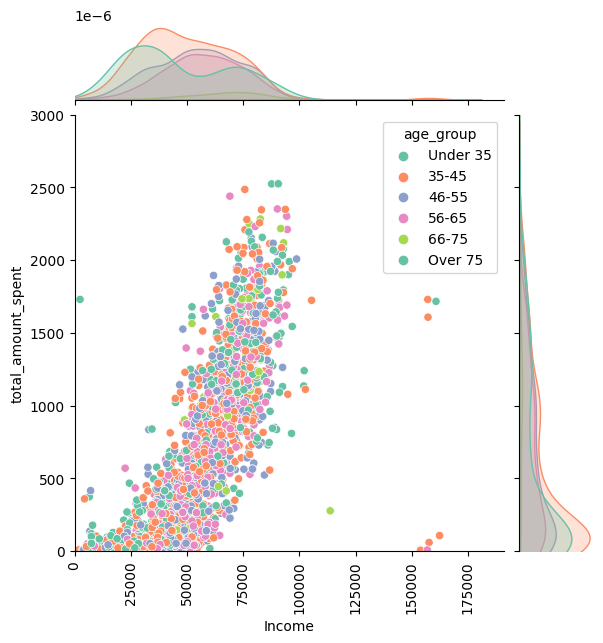

In [ ]:
total_amount = Data['MntWines']+Data['MntFruits']+Data['MntMeatProducts']+Data['MntFishProducts']+Data['MntSweetProducts']+Data['MntGoldProds']

customer_data['total_amount_spent'] = total_amount

# Filter the data
t = customer_data[(customer_data["age"] < 100) & (customer_data["Income"] < 3e+05)]

# Generate a palette based on the number of unique age groups
num_age_groups = t["age_group"].nunique()
cmap = sns.color_palette("Set2", n_colors=num_age_groups)

# Plot
joint_plot = sns.jointplot(x="Income", y="total_amount_spent", data=t, kind='scatter', hue="age_group", palette=cmap)

plt.xlim(0, None)
plt.ylim(0, 3000)
plt.xticks(rotation=90)
plt.show()

## Data processing

*Handling missing value*

In [ ]:
mean_value = Data["Income"].mean()

# Impute missing values with the mean
Data["Income"].fillna(mean_value, inplace=True)

*Setting x and y*

In [ ]:
X=Data.drop("Response",axis=1)
y=Data["Response"]

*Data cleaning*

In [ ]:
label_encoder_education = LabelEncoder()
label_encoder_marital_status = LabelEncoder()


# Apply LabelEncoder to specific columns
X['Education'] = label_encoder_education.fit_transform(X['Education'])
X['Marital_Status'] = label_encoder_marital_status.fit_transform(X['Marital_Status'])

X['Dt_Customer'] = pd.to_datetime(X['Dt_Customer'],format='%d-%m-%Y')

# Extract relevant date features
X['C_Year'] = X['Dt_Customer'].dt.year
X['C_Month'] = X['Dt_Customer'].dt.month
X['C_Day'] = X['Dt_Customer'].dt.day

# Drop the original date column if you no longer need it
X.drop('Dt_Customer', axis=1, inplace=True)

*Splitting the dataset*

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## Data imbalance

*Check for class imbalance*

In [ ]:
print(Data['Response'].value_counts())

0    1906
1     334
Name: Response, dtype: int64


In [ ]:
#probability of responding
prob_resp = len(y[y == 1]) / len(y)
print(f"probability of  responding is {prob_resp}")

#probability of not responding
prob_not = len(y[y == 0]) / len(y)
print(f"probability of not responding is {prob_not}")

probability of  responding is 0.14910714285714285
probability of not responding is 0.8508928571428571


In [ ]:
#Data.describe()

*Dealing with class imbalance*

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

## Model Building

*Standardizing*

In [ ]:
Scale = StandardScaler()

Scale.fit(X_train)
X_train = Scale.transform(X_train)

Scale.fit(X_rus)
X_rus = Scale.transform(X_rus)

Scale.fit(X_ros)
X_ros = Scale.transform(X_ros)

Scale.fit(X_smote)
X_smote = Scale.transform(X_smote)

X_test = Scale.transform(X_test)

### Decision tree

#### RandomUnderSampler

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(X_rus, y_rus)
y_train_pred = cross_val_predict(tree, X_rus, y_rus, cv=10)
y_test_pred = cross_val_predict(tree, X_test, y_test, cv=10)

train_accuracy = accuracy_score(y_rus, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_recall = recall_score(y_rus, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_precision = precision_score(y_rus, y_train_pred)
test_precision = precision_score(y_rus, y_train_pred)

train_f1 = f1_score(y_rus, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Accuracy (In-Sample):", train_accuracy)
print("Accuracy (Out-of-Sample):", test_accuracy)
print("Recall (In-Sample):", train_recall)
print("Recall (Out-of-Sample):", test_recall)
print("Precision (In-Sample):", train_precision)
print("Precision (Out-of-Sample):", test_precision)
print("F1 Score (In-Sample):", train_f1)
print("F1 Score (Out-of-Sample):", test_f1)

Accuracy (In-Sample): 0.6987179487179487
Accuracy (Out-of-Sample): 0.7886904761904762
Recall (In-Sample): 0.7051282051282052
Recall (Out-of-Sample): 0.36
Precision (In-Sample): 0.6962025316455697
Precision (Out-of-Sample): 0.6962025316455697
F1 Score (In-Sample): 0.7006369426751593
F1 Score (Out-of-Sample): 0.3364485981308411


#### RandomOverSampler

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(X_ros, y_ros)
y_train_pred = cross_val_predict(tree, X_ros, y_ros, cv=10)
y_test_pred = cross_val_predict(tree, X_test, y_test, cv=10)

train_accuracy = accuracy_score(y_ros, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_recall = recall_score(y_ros, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_precision = precision_score(y_ros, y_train_pred)
test_precision = precision_score(y_ros, y_train_pred)

train_f1 = f1_score(y_ros, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Accuracy (In-Sample):", train_accuracy)
print("Accuracy (Out-of-Sample):", test_accuracy)
print("Recall (In-Sample):", train_recall)
print("Recall (Out-of-Sample):", test_recall)
print("Precision (In-Sample):", train_precision)
print("Precision (Out-of-Sample):", test_precision)
print("F1 Score (In-Sample):", train_f1)
print("F1 Score (Out-of-Sample):", test_f1)

Accuracy (In-Sample): 0.9535232383808095
Accuracy (Out-of-Sample): 0.8244047619047619
Recall (In-Sample): 1.0
Recall (Out-of-Sample): 0.43
Precision (In-Sample): 0.9149519890260631
Precision (Out-of-Sample): 0.9149519890260631
F1 Score (In-Sample): 0.9555873925501432
F1 Score (Out-of-Sample): 0.4215686274509804


#### Smote

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(X_smote, y_smote)
y_train_pred = cross_val_predict(tree, X_smote, y_smote, cv=10)
y_test_pred = cross_val_predict(tree, X_test, y_test, cv=10)

train_accuracy = accuracy_score(y_smote, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_recall = recall_score(y_smote, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_precision = precision_score(y_smote, y_train_pred)
test_precision = precision_score(y_smote, y_train_pred)

train_f1 = f1_score(y_smote, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

train_auc = roc_auc_score(y_smote, y_train_pred)
test_auc = roc_auc_score(y_test, y_test_pred)

print("Accuracy (In-Sample):", train_accuracy)
print("Accuracy (Out-of-Sample):", test_accuracy)
print("Recall (In-Sample):", train_recall)
print("Recall (Out-of-Sample):", test_recall)
print("Precision (In-Sample):", train_precision)
print("Precision (Out-of-Sample):", test_precision)
print("F1 Score (In-Sample):", train_f1)
print("F1 Score (Out-of-Sample):", test_f1)

Accuracy (In-Sample): 0.8616941529235382
Accuracy (Out-of-Sample): 0.8020833333333334
Recall (In-Sample): 0.8868065967016492
Recall (Out-of-Sample): 0.36
Precision (In-Sample): 0.8443968593861527
Precision (Out-of-Sample): 0.8443968593861527
F1 Score (In-Sample): 0.8650822669104203
F1 Score (Out-of-Sample): 0.351219512195122


#### Not adjusted for imbalance

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_train_pred = cross_val_predict(tree, X_train, y_train, cv=10)
y_test_pred = cross_val_predict(tree, X_test, y_test, cv=10)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_train, y_train_pred)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

train_auc = roc_auc_score(y_train, y_train_pred)
test_auc = roc_auc_score(y_test, y_test_pred)

print("Accuracy (In-Sample):", train_accuracy)
print("Accuracy (Out-of-Sample):", test_accuracy)
print("Recall (In-Sample):", train_recall)
print("Recall (Out-of-Sample):", test_recall)
print("Precision (In-Sample):", train_precision)
print("Precision (Out-of-Sample):", test_precision)
print("F1 Score (In-Sample):", train_f1)
print("F1 Score (Out-of-Sample):", test_f1)

Accuracy (In-Sample): 0.8284438775510204
Accuracy (Out-of-Sample): 0.8065476190476191
Recall (In-Sample): 0.4230769230769231
Recall (Out-of-Sample): 0.38
Precision (In-Sample): 0.4248927038626609
Precision (Out-of-Sample): 0.4248927038626609
F1 Score (In-Sample): 0.423982869379015
F1 Score (Out-of-Sample): 0.3689320388349514


### Logistic regression

In [ ]:
from  warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

#### RandomUnderSampler

In [ ]:
lr = LogisticRegression()
lr.fit(X_rus, y_rus)
y_train_pred = cross_val_predict(lr, X_rus, y_rus, cv=10)
y_test_pred = cross_val_predict(lr, X_test, y_test, cv=10)

train_accuracy = accuracy_score(y_rus, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_recall = recall_score(y_rus, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_precision = precision_score(y_rus, y_train_pred)
test_precision = precision_score(y_rus, y_train_pred)

train_f1 = f1_score(y_rus, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

train_auc = roc_auc_score(y_rus, y_train_pred)
test_auc = roc_auc_score(y_test, y_test_pred)

print("Accuracy (In-Sample):", train_accuracy)
print("Accuracy (Out-of-Sample):", test_accuracy)
print("Recall (In-Sample):", train_recall)
print("Recall (Out-of-Sample):", test_recall)
print("Precision (In-Sample):", train_precision)
print("Precision (Out-of-Sample):", test_precision)
print("F1 Score (In-Sample):", train_f1)
print("F1 Score (Out-of-Sample):", test_f1)

Accuracy (In-Sample): 0.7905982905982906
Accuracy (Out-of-Sample): 0.8973214285714286
Recall (In-Sample): 0.7863247863247863
Recall (Out-of-Sample): 0.48
Precision (In-Sample): 0.7931034482758621
Precision (Out-of-Sample): 0.7931034482758621
F1 Score (In-Sample): 0.7896995708154507
F1 Score (Out-of-Sample): 0.5818181818181819


#### RandomOverSampler

In [ ]:
lr = LogisticRegression()
lr.fit(X_ros, y_ros)
y_train_pred = cross_val_predict(lr, X_ros, y_ros, cv=10)
y_test_pred = cross_val_predict(lr, X_test, y_test, cv=10)

train_accuracy = accuracy_score(y_ros, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_recall = recall_score(y_ros, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_precision = precision_score(y_ros, y_train_pred)
test_precision = precision_score(y_ros, y_train_pred)

train_f1 = f1_score(y_ros, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

train_auc = roc_auc_score(y_ros, y_train_pred)
test_auc = roc_auc_score(y_test, y_test_pred)

print("Accuracy (In-Sample):", train_accuracy)
print("Accuracy (Out-of-Sample):", test_accuracy)
print("Recall (In-Sample):", train_recall)
print("Recall (Out-of-Sample):", test_recall)
print("Precision (In-Sample):", train_precision)
print("Precision (Out-of-Sample):", test_precision)
print("F1 Score (In-Sample):", train_f1)
print("F1 Score (Out-of-Sample):", test_f1)

Accuracy (In-Sample): 0.8185907046476761
Accuracy (Out-of-Sample): 0.8973214285714286
Recall (In-Sample): 0.8065967016491754
Recall (Out-of-Sample): 0.48
Precision (In-Sample): 0.82642089093702
Precision (Out-of-Sample): 0.82642089093702
F1 Score (In-Sample): 0.8163884673748103
F1 Score (Out-of-Sample): 0.5818181818181819


#### Smote

In [ ]:
lr = LogisticRegression()
lr.fit(X_smote, y_smote)
y_train_pred = cross_val_predict(lr, X_smote, y_smote, cv=10)
y_test_pred = cross_val_predict(lr, X_test, y_test, cv=10)

train_accuracy = accuracy_score(y_smote, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_recall = recall_score(y_smote, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_precision = precision_score(y_smote, y_train_pred)
test_precision = precision_score(y_smote, y_train_pred)

train_f1 = f1_score(y_smote, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

train_auc = roc_auc_score(y_smote, y_train_pred)
test_auc = roc_auc_score(y_test, y_test_pred)

print("Accuracy (In-Sample):", train_accuracy)
print("Accuracy (Out-of-Sample):", test_accuracy)
print("Recall (In-Sample):", train_recall)
print("Recall (Out-of-Sample):", test_recall)
print("Precision (In-Sample):", train_precision)
print("Precision (Out-of-Sample):", test_precision)
print("F1 Score (In-Sample):", train_f1)
print("F1 Score (Out-of-Sample):", test_f1)

Accuracy (In-Sample): 0.8448275862068966
Accuracy (Out-of-Sample): 0.8973214285714286
Recall (In-Sample): 0.8523238380809596
Recall (Out-of-Sample): 0.48
Precision (In-Sample): 0.8397341211225997
Precision (Out-of-Sample): 0.8397341211225997
F1 Score (In-Sample): 0.8459821428571429
F1 Score (Out-of-Sample): 0.5818181818181819


#### Not adjusted for imbalance

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_train_pred = cross_val_predict(lr, X_train, y_train, cv=10)
y_test_pred = cross_val_predict(lr, X_test, y_test, cv=10)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_train, y_train_pred)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

train_auc = roc_auc_score(y_train, y_train_pred)
test_auc = roc_auc_score(y_test, y_test_pred)

print("Accuracy (In-Sample):", train_accuracy)
print("Accuracy (Out-of-Sample):", test_accuracy)
print("Recall (In-Sample):", train_recall)
print("Recall (Out-of-Sample):", test_recall)
print("Precision (In-Sample):", train_precision)
print("Precision (Out-of-Sample):", test_precision)
print("F1 Score (In-Sample):", train_f1)
print("F1 Score (Out-of-Sample):", test_f1)

Accuracy (In-Sample): 0.8832908163265306
Accuracy (Out-of-Sample): 0.8973214285714286
Recall (In-Sample): 0.41452991452991456
Recall (Out-of-Sample): 0.48
Precision (In-Sample): 0.6783216783216783
Precision (Out-of-Sample): 0.6783216783216783
F1 Score (In-Sample): 0.5145888594164456
F1 Score (Out-of-Sample): 0.5818181818181819


### kNN

#### RandomUnderSampler

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_rus, y_rus)
y_train_pred = cross_val_predict(knn, X_rus, y_rus, cv=10)
y_test_pred = cross_val_predict(knn, X_test, y_test, cv=10)

train_accuracy = accuracy_score(y_rus, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_recall = recall_score(y_rus, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_precision = precision_score(y_rus, y_train_pred)
test_precision = precision_score(y_rus, y_train_pred)

train_f1 = f1_score(y_rus, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

train_auc = roc_auc_score(y_rus, y_train_pred)
test_auc = roc_auc_score(y_test, y_test_pred)

print("Accuracy (In-Sample):", train_accuracy)
print("Accuracy (Out-of-Sample):", test_accuracy)
print("Recall (In-Sample):", train_recall)
print("Recall (Out-of-Sample):", test_recall)
print("Precision (In-Sample):", train_precision)
print("Precision (Out-of-Sample):", test_precision)
print("F1 Score (In-Sample):", train_f1)
print("F1 Score (Out-of-Sample):", test_f1)

Accuracy (In-Sample): 0.7307692307692307
Accuracy (Out-of-Sample): 0.8303571428571429
Recall (In-Sample): 0.7307692307692307
Recall (Out-of-Sample): 0.21
Precision (In-Sample): 0.7307692307692307
Precision (Out-of-Sample): 0.7307692307692307
F1 Score (In-Sample): 0.7307692307692306
F1 Score (Out-of-Sample): 0.2692307692307693


#### RandomOverSampler

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_ros, y_ros)
y_train_pred = cross_val_predict(knn, X_ros, y_ros, cv=10)
y_test_pred = cross_val_predict(knn, X_test, y_test, cv=10)

train_accuracy = accuracy_score(y_ros, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_recall = recall_score(y_ros, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_precision = precision_score(y_ros, y_train_pred)
test_precision = precision_score(y_ros, y_train_pred)

train_f1 = f1_score(y_ros, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

train_auc = roc_auc_score(y_ros, y_train_pred)
test_auc = roc_auc_score(y_test, y_test_pred)

print("Accuracy (In-Sample):", train_accuracy)
print("Accuracy (Out-of-Sample):", test_accuracy)
print("Recall (In-Sample):", train_recall)
print("Recall (Out-of-Sample):", test_recall)
print("Precision (In-Sample):", train_precision)
print("Precision (Out-of-Sample):", test_precision)
print("F1 Score (In-Sample):", train_f1)
print("F1 Score (Out-of-Sample):", test_f1)

Accuracy (In-Sample): 0.9122938530734632
Accuracy (Out-of-Sample): 0.8303571428571429
Recall (In-Sample): 0.987256371814093
Recall (Out-of-Sample): 0.21
Precision (In-Sample): 0.8585397653194263
Precision (Out-of-Sample): 0.8585397653194263
F1 Score (In-Sample): 0.9184100418410042
F1 Score (Out-of-Sample): 0.2692307692307693


#### Smote

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_smote, y_smote)
y_train_pred = cross_val_predict(knn, X_smote, y_smote, cv=10)
y_test_pred = cross_val_predict(knn, X_test, y_test, cv=10)

train_accuracy = accuracy_score(y_smote, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_recall = recall_score(y_smote, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_precision = precision_score(y_smote, y_train_pred)
test_precision = precision_score(y_smote, y_train_pred)

train_f1 = f1_score(y_smote, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

train_auc = roc_auc_score(y_smote, y_train_pred)
test_auc = roc_auc_score(y_test, y_test_pred)

print("Accuracy (In-Sample):", train_accuracy)
print("Accuracy (Out-of-Sample):", test_accuracy)
print("Recall (In-Sample):", train_recall)
print("Recall (Out-of-Sample):", test_recall)
print("Precision (In-Sample):", train_precision)
print("Precision (Out-of-Sample):", test_precision)
print("F1 Score (In-Sample):", train_f1)
print("F1 Score (Out-of-Sample):", test_f1)

Accuracy (In-Sample): 0.8511994002998501
Accuracy (Out-of-Sample): 0.8571428571428571
Recall (In-Sample): 0.9737631184407796
Recall (Out-of-Sample): 0.28
Precision (In-Sample): 0.7820590006020469
Precision (Out-of-Sample): 0.7820590006020469
F1 Score (In-Sample): 0.8674457429048414
F1 Score (Out-of-Sample): 0.3684210526315789


#### Not adjusted for imbalance

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_train_pred = cross_val_predict(knn, X_train, y_train, cv=10)
y_test_pred = cross_val_predict(knn, X_test, y_test, cv=10)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_train, y_train_pred)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

train_auc = roc_auc_score(y_train, y_train_pred)
test_auc = roc_auc_score(y_test, y_test_pred)

print("Accuracy (In-Sample):", train_accuracy)
print("Accuracy (Out-of-Sample):", test_accuracy)
print("Recall (In-Sample):", train_recall)
print("Recall (Out-of-Sample):", test_recall)
print("Precision (In-Sample):", train_precision)
print("Precision (Out-of-Sample):", test_precision)
print("F1 Score (In-Sample):", train_f1)
print("F1 Score (Out-of-Sample):", test_f1)

Accuracy (In-Sample): 0.8539540816326531
Accuracy (Out-of-Sample): 0.8571428571428571
Recall (In-Sample): 0.3418803418803419
Recall (Out-of-Sample): 0.28
Precision (In-Sample): 0.5161290322580645
Precision (Out-of-Sample): 0.5161290322580645
F1 Score (In-Sample): 0.41131105398457585
F1 Score (Out-of-Sample): 0.3684210526315789


## Best model

#### Decision tree with RandomOverSampler

In [ ]:
# Define the parameter grid
parameters = {
    'max_depth': range(3, 20),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store results
best_scores = []
best_params_list = []

# Outer cross-validation loop
for train_index, test_index in outer_cv.split(X_ros, y_ros):
    X_train_outer, X_test_outer = X_ros[train_index], X_ros[test_index]
    y_train_outer, y_test_outer = y_ros[train_index], y_ros[test_index]

    # Initialize the GridSearchCV object for hyperparameter tuning
    gs_dt = GridSearchCV(DecisionTreeClassifier(),
                         parameters,
                         scoring='precision',
                         cv=inner_cv,
                         n_jobs=4)

    gs_dt.fit(X_train_outer, y_train_outer)

    # Get the best hyperparameters and score from the inner loop
    best_params_inner = gs_dt.best_params_
    best_score_inner = gs_dt.best_score_

    best_params_list.append(best_params_inner)
    best_scores.append(best_score_inner)

# Calculate the mean and standard deviation of the best scores
mean_best_score = np.mean(best_scores)
std_best_score = np.std(best_scores)

# Get the best hyperparameters from the outer loop
best_params_outer = best_params_list[np.argmax(best_scores)]

print("Best Precision for Decision Tree Classifier (Nested CV): ", mean_best_score)
print("Best hyperparameters for Decision Tree Classifier (Nested CV): ", best_params_outer)

Best Precision for Decision Tree Classifier (Nested CV):  0.8890089977775496
Best hyperparameters for Decision Tree Classifier (Nested CV):  {'criterion': 'gini', 'max_depth': 17, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [ ]:
tree = DecisionTreeClassifier(criterion = 'gini',
                              max_depth = 17,
                              min_samples_leaf = 2,
                              min_samples_split = 5)
tree.fit(X_ros, y_ros)
y_train_pred = cross_val_predict(tree, X_ros, y_ros, cv=10)
y_test_pred = cross_val_predict(tree, X_test, y_test, cv=10)

train_accuracy = accuracy_score(y_ros, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_recall = recall_score(y_ros, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_precision = precision_score(y_ros, y_train_pred)
test_precision = precision_score(y_ros, y_train_pred)

train_f1 = f1_score(y_ros, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Accuracy (In-Sample):", train_accuracy)
print("Accuracy (Out-of-Sample):", test_accuracy)
print("Recall (In-Sample):", train_recall)
print("Recall (Out-of-Sample):", test_recall)
print("Precision (In-Sample):", train_precision)
print("Precision (Out-of-Sample):", test_precision)
print("F1 Score (In-Sample):", train_f1)
print("F1 Score (Out-of-Sample):", test_f1)

Accuracy (In-Sample): 0.931784107946027
Accuracy (Out-of-Sample): 0.8258928571428571
Recall (In-Sample): 0.987256371814093
Recall (Out-of-Sample): 0.33
Precision (In-Sample): 0.888663967611336
Precision (Out-of-Sample): 0.888663967611336
F1 Score (In-Sample): 0.9353693181818182
F1 Score (Out-of-Sample): 0.36065573770491804


*Optimized decision tree out-of-sample precision: 0.893*

#### Logistic regression with Smote

In [ ]:
# Define the parameter grid
parameters = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
}

outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store results
best_scores = []
best_params_list = []

# Outer cross-validation loop
for train_index, test_index in outer_cv.split(X_smote, y_smote):
    X_train_outer, X_test_outer = X_smote[train_index], X_smote[test_index]
    y_train_outer, y_test_outer = y_smote[train_index], y_smote[test_index]

    # Initialize the GridSearchCV object for hyperparameter tuning
    gs_lr = GridSearchCV(LogisticRegression(),
                     parameters,
                     scoring='precision',
                     cv=inner_cv,
                     n_jobs=4)

    # Fit the GridSearchCV on the training data
    gs_lr.fit(X_train_outer, y_train_outer)

    # Get the best hyperparameters and score from the inner loop
    best_params_inner = gs_lr.best_params_
    best_score_inner = gs_lr.best_score_

    best_params_list.append(best_params_inner)
    best_scores.append(best_score_inner)

# Calculate the mean and standard deviation of the best scores
mean_best_score = np.mean(best_scores)
std_best_score = np.std(best_scores)

# Get the best hyperparameters from the outer loop
best_params_outer = best_params_list[np.argmax(best_scores)]

print("Best Precision for Logistic Regression (Nested CV): ", mean_best_score)
print("Best hyperparameters for Logistic Regression (Nested CV): ", best_params_outer)

Best Precision for Logistic Regression (Nested CV):  0.8437103070725914
Best hyperparameters for Logistic Regression (Nested CV):  {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
lr = LogisticRegression(C = 10,
                        penalty = 'l1',
                        solver = 'liblinear')
lr.fit(X_smote, y_smote)
y_train_pred = cross_val_predict(lr, X_smote, y_smote, cv=10)
y_test_pred = cross_val_predict(lr, X_test, y_test, cv=10)

train_accuracy = accuracy_score(y_smote, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_recall = recall_score(y_smote, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_precision = precision_score(y_smote, y_train_pred)
test_precision = precision_score(y_smote, y_train_pred)

train_f1 = f1_score(y_smote, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

train_auc = roc_auc_score(y_smote, y_train_pred)
test_auc = roc_auc_score(y_test, y_test_pred)

print("Accuracy (In-Sample):", train_accuracy)
print("Accuracy (Out-of-Sample):", test_accuracy)
print("Recall (In-Sample):", train_recall)
print("Recall (Out-of-Sample):", test_recall)
print("Precision (In-Sample):", train_precision)
print("Precision (Out-of-Sample):", test_precision)
print("F1 Score (In-Sample):", train_f1)
print("F1 Score (Out-of-Sample):", test_f1)

Accuracy (In-Sample): 0.845952023988006
Accuracy (Out-of-Sample): 0.8958333333333334
Recall (In-Sample): 0.8538230884557722
Recall (Out-of-Sample): 0.49
Precision (In-Sample): 0.8405904059040591
Precision (Out-of-Sample): 0.8405904059040591
F1 Score (In-Sample): 0.8471550762365192
F1 Score (Out-of-Sample): 0.5833333333333334


*Optimized logistic regression out-of-sample precision: 0.841*

#### kNN with RandomOverSampler

In [ ]:
# Define the parameter grid
parameters = {
    'n_neighbors': range(3, 20),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
}

outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store results
best_scores = []
best_params_list = []

# Outer cross-validation loop
for train_index, test_index in outer_cv.split(X_ros, y_ros):
    X_train_outer, X_test_outer = X_ros[train_index], X_ros[test_index]
    y_train_outer, y_test_outer = y_ros[train_index], y_ros[test_index]

    # Initialize the GridSearchCV object for hyperparameter tuning
    gs_knn = GridSearchCV(KNeighborsClassifier(),
                         parameters,
                         scoring='precision',
                         cv=inner_cv,
                         n_jobs=4)

    gs_knn.fit(X_train_outer, y_train_outer)

    # Get the best hyperparameters and score from the inner loop
    best_params_inner = gs_knn.best_params_
    best_score_inner = gs_knn.best_score_

    best_params_list.append(best_params_inner)
    best_scores.append(best_score_inner)

# Calculate the mean and standard deviation of the best scores
mean_best_score = np.mean(best_scores)
std_best_score = np.std(best_scores)

best_params_outer = best_params_list[np.argmax(best_scores)]

print("Best Precision for K-Nearest Neighbors (Nested CV): ", mean_best_score)
print("Best hyperparameters for K-Nearest Neighbors (Nested CV): ", best_params_outer)

Best Precision for K-Nearest Neighbors (Nested CV):  0.858813381918343
Best hyperparameters for K-Nearest Neighbors (Nested CV):  {'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'uniform'}


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 4,
                           metric = 'manhattan',
                           weights = 'uniform')
knn.fit(X_ros, y_ros)
y_train_pred = cross_val_predict(knn, X_ros, y_ros, cv=10)
y_test_pred = cross_val_predict(knn, X_test, y_test, cv=10)

train_accuracy = accuracy_score(y_ros, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_recall = recall_score(y_ros, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_precision = precision_score(y_ros, y_train_pred)
test_precision = precision_score(y_ros, y_train_pred)

train_f1 = f1_score(y_ros, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

train_auc = roc_auc_score(y_ros, y_train_pred)
test_auc = roc_auc_score(y_test, y_test_pred)

print("Accuracy (In-Sample):", train_accuracy)
print("Accuracy (Out-of-Sample):", test_accuracy)
print("Recall (In-Sample):", train_recall)
print("Recall (Out-of-Sample):", test_recall)
print("Precision (In-Sample):", train_precision)
print("Precision (Out-of-Sample):", test_precision)
print("F1 Score (In-Sample):", train_f1)
print("F1 Score (Out-of-Sample):", test_f1)

Accuracy (In-Sample): 0.9081709145427287
Accuracy (Out-of-Sample): 0.8645833333333334
Recall (In-Sample): 0.9557721139430285
Recall (Out-of-Sample): 0.15
Precision (In-Sample): 0.8726899383983573
Precision (Out-of-Sample): 0.8726899383983573
F1 Score (In-Sample): 0.9123434704830053
F1 Score (Out-of-Sample): 0.24793388429752064


*Optimized k-NN out-of-sample precision: 0.873*